<a href="https://colab.research.google.com/github/tsakailab/iip/blob/main/colab/iip_model_visualize_conv_kernels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# カーネルの可視化

物体認識のCNNモデルは，どのような局所特徴を調べているのでしょうか．**CNNのカーネル（convolutional filter kernels）**を可視化します．

In [ ]:
#@title カーネルを可視化する関数 plot_weight を定義します．
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm as tsn

def plot_filters(kernels, max_ch):
    
    nch_out = min(kernels.shape[0], max_ch)
    nch_in = min(kernels.shape[1], max_ch)
    print("(out_channels, in_channels, kernel height, kernel width) =", kernels.shape)
    print("Displaying", nch_out, "kernels in columns (depth =", kernels.shape[1], ").")

    norm = tsn(vmin=np.minimum(kernels.min(),-1e-6), vcenter=0, vmax=np.maximum(kernels.max(),1e-6))
    fig = plt.figure(figsize=(nch_out, nch_in))
    count = 1
    for ch_in in range(nch_in):
        for ch_out in range(nch_out):
            ax1 = fig.add_subplot(nch_in, nch_out, count)
            #plt.axis('off')
            ax1.imshow(kernels[ch_out, ch_in], cmap='bwr_r', norm=norm, aspect='equal')
            ax1.set_xticklabels([])
            ax1.set_yticklabels([])
            count += 1
    plt.tight_layout()
    plt.show()


def plot_filters_color(kernels, max_ch):
    
    nch_out = kernels.shape[0] # min(kernels.shape[0], max_ch)
    nch_in = max_ch

    print("(out_channels, in_channels, kernel height, kernel width) =", kernels.shape)
    print("Displaying", nch_out, "kernels in color.")
    fig = plt.figure(figsize=(nch_in, nch_out))
    for i in range(nch_out):
        ax1 = fig.add_subplot(nch_out, nch_in, i + 1)
        
        #for each kernel, we convert the tensor to numpy 
        #npimg = np.array(t[i].numpy(), np.float32)
        npimg = kernels[i]
        #standardize the numpy image
        npimg = (npimg - np.mean(npimg)) / np.std(npimg)
        npimg = np.minimum(1, np.maximum(0, (npimg + 0.5)))
        npimg = npimg.transpose((1, 2, 0))
        ax1.imshow(npimg)
        #ax1.axis('off')
        ax1.set_title(str(i))
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
    plt.tight_layout()
    plt.show()


def plot_weights(model, layer_num, isColor=False, max_ch=12):

    #extracting the model features at the particular layer number
    layer = model.features[layer_num]
  
    #checking whether the layer is convolution layer or not 
    if not isinstance(layer, torch.nn.Conv2d):
        print("Can only visualize layers which are convolutional.")
        return

    #getting the weight tensor data
    kernels = layer.weight.data.cpu().numpy()

    if kernels.shape[1] != 3 or not isColor:
        plot_filters(kernels, max_ch=max_ch)
    else:
        plot_filters_color(kernels, max_ch=max_ch)

#### 学習済みのCNNモデルをTorchvisionから入手します．

[The pre-trained models have been trained on a subset of COCO train2017, on the 20 categories that are present in the Pascal VOC dataset.](https://pytorch.org/vision/stable/models.html)

In [ ]:
import torch
from torchvision import models

model = models.alexnet(pretrained=True)
#model = models.vgg16(pretrained=True)
#model = models.vgg16_bn(pretrained=True)
#model = models.resnet50(pretrained=True)
#model = models.googlenet(pretrained=True)
#model = models.mobilenet_v3_small(pretrained=True)
#model = models.efficientnet_b0(pretrained=True)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

#### カーネルを表示します．

layer_num は，畳み込み層 Conv2d の番号を指定してください．

(out_channels, in_channels, kernel height, kernel width) = (64, 3, 11, 11)
Displaying 64 kernels in color.


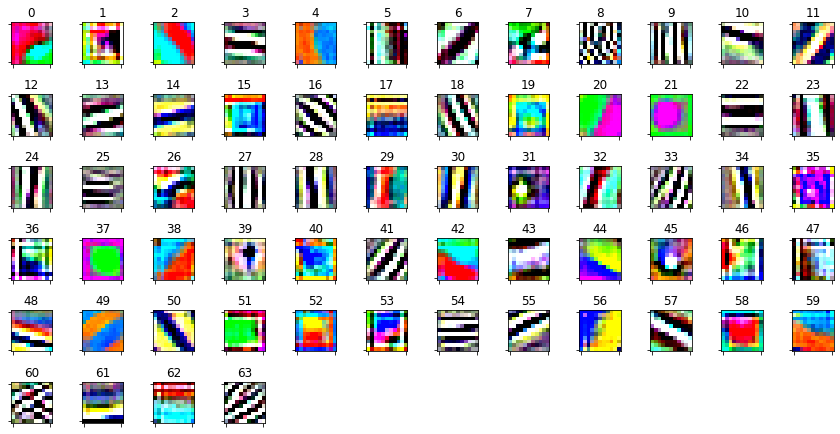

In [ ]:
plot_weights(model, layer_num = 0, isColor=True)

(out_channels, in_channels, kernel height, kernel width) = (192, 64, 5, 5)
Displaying 12 kernels in columns (depth = 64 ).


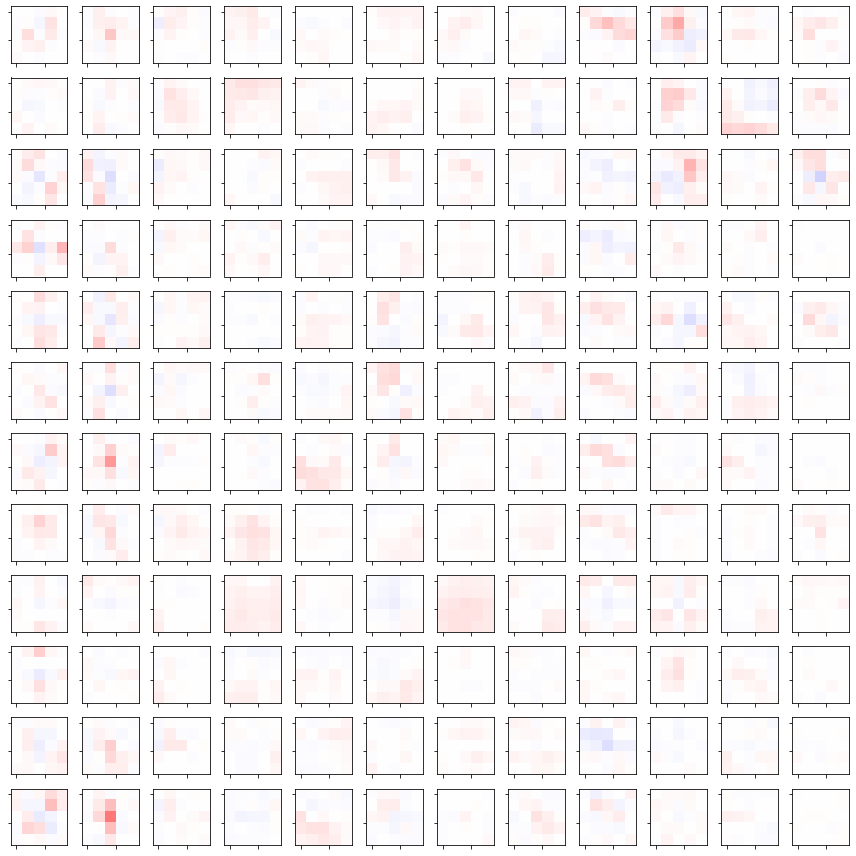

In [ ]:
plot_weights(model, layer_num = 3)

# 要点
<!--
畳み込み演算によって，カーネルに類似した模様が見つかる場所と量（局所特徴量）を表す出力画像が得られることを理解できたでしょうか．このように局所特徴量の分布を表す画像を**特徴マップ（feature map）**といいます．
-->

カーネルを何種類も用意すれば，エッジや凹凸の断片，色の組合せなど，様々な局所特徴について特徴マップを作成できます．３枚の入力で表せるカラー画像から特徴マップを出力するときと同様に，複数の特徴マップからひとつの特徴マップを作ることもできます．

様々な局所特徴量の分布を表す複数の特徴マップに対する畳み込み演算は，局所特徴の典型的な組合せを探すことに相当します．出力の特徴マップは，典型的な局所特徴の組合せが見つかる場所と量を表しています．
<!--
畳み込み演算をする**畳み込み層（convolutional layer）**は，複数の特徴マップから複数の特徴マップを作成します．入力（出力）の特徴マップは，入力（出力）チャンネル（input/output channels）とも呼ばれます．

畳み込み層を何段ももつ**畳み込みニューラルネットワーク（convolutional neural network; CNN）**は，典型的な局所特徴の組合せ，その典型的な組合せの組合せ，さらにその組合せ・・を探す機構です．畳み込み層の間には適宜，**活性化層（activation layer）**や**プーリング層（pooling layer）**などが入ります．

活性化層は，特徴量を強調または選び出す処理により，典型的な局所特徴を見つけやすくします．プーリング層は特徴マップをぼかしてサイズを縮小します．縮小すると，局所特徴を広目に探せるようになるからです．

こららの層で構成された**特徴抽出器（feature extractor）**によって，入力画像がもつ特徴を定量化できます．**全結合層（fully connected (fc) layers）**は，特徴抽出器の出力から目的の量を算出します．物体認識の場合，全結合層は，想定している各物体が存在する確率を算出する**識別器（classifier）**の役割を担います．
-->

![](https://www.researchgate.net/publication/329790469/figure/fig2/AS:705721712787456@1545268576139/Simplified-illustration-of-the-AlexNet-architecture.ppm)
![](https://upload.wikimedia.org/wikipedia/commons/6/63/Typical_cnn.png)


# 参考資料
[VGG](https://arxiv.org/abs/1409.1556)，
[ResNet](https://arxiv.org/abs/1512.03385)，
[Inception](https://arxiv.org/abs/1512.00567)，
[GoogLeNet](https://arxiv.org/abs/1409.4842)，
[参考1](https://medium.com/zylapp/review-of-deep-learning-algorithms-for-image-classification-5fdbca4a05e2)，
[参考2](https://www.topbots.com/important-cnn-architectures/)

![](https://www.researchgate.net/profile/Evgeny-Baraboshkin/publication/335989937/figure/fig3/AS:806501341999104@1569296312136/Neural-networks-architecture-simplified-sketches-inception-and-residual-modules.png)
Neural networks architecture simplified sketches, inception and residual modules structures can be observed in the detailed network maps in online repository ("Supplementary materials to the article," n.d.). 0 -convolutoion layer, 1 -activation layer, 2 -Inception module, 3 -average pooling, 4 -batch normalization, 5 -max pooling, 6 -zero padding, 7 -Residual module, 8 -drop out layer, 9 -layer composition, 10 -dense layer.


![](https://drek4537l1klr.cloudfront.net/elgendy/v-3/Figures/05_27.png)
![](https://i.ytimg.com/vi/VxhSouuSZDY/maxresdefault.jpg)

